In [122]:
import geobr
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
# reading database
df = geobr.read_micro_region(code_micro="all", year=2019)




In [124]:
# read results

results_main = pd.read_pickle('data/results_new/main_results_microregion_coffee_husk.p')

biomass = ['rice_husk', 'coffee_husk', 'corn_stover', 'soy_straw', 'sugarcane_straw', 'sugarcane_bagasse']
cols = [bio+'_used'  for bio in biomass]
results_main['biomass_used'] = results_main[cols].sum(axis=1)


data_urea = df.loc[df['code_micro'].isin(results_main[results_main['urea_sold'] > 1].index)]
data_biomass = df.loc[df['code_micro'].isin(results_main[results_main['biomass_used'] > 1].index)]

plant_location = df.loc[df['code_micro'].isin(results_main[results_main['plant_installed'] > 0.5].index)]


data_urea['centroids'] = None
data_urea['centroids'] = data_urea.centroid
data_urea['distance_to_plant'] = None
data_urea['distance_to_plant'] = data_urea['centroids'].apply(lambda x: x.distance(plant_location.centroid))

df['centroids'] = None
df['centroids'] = df.centroid
df['distance_to_plant'] = None
df['distance_to_plant'] = df['centroids'].apply(lambda x: x.distance(plant_location.centroid))

max_distance = data_urea['distance_to_plant'].max()
df_zoom = df.loc[df['distance_to_plant'] < 2*max_distance]

results_main.loc[results_main['biomass_used'] > 1]
data_biomass

/home/diego/code/UreaOpt/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_8256/3967026612.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_urea['centroids'] = data_urea.centroid
/home/diego/code/UreaOpt/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,code_state,abbrev_state,name_state,code_micro,name_micro,geometry
266,31.0,MG,Minas Gerais,31015.0,Teófilo Otoni,"MULTIPOLYGON (((-41.3514 -17.3467, -41.34778 -..."
281,31.0,MG,Minas Gerais,31030.0,Belo Horizonte,"MULTIPOLYGON (((-44.35461 -19.9052, -44.35519 ..."
282,31.0,MG,Minas Gerais,31031.0,Itabira,"MULTIPOLYGON (((-43.20062 -19.4221, -43.19909 ..."
284,31.0,MG,Minas Gerais,31033.0,Ouro Preto,"MULTIPOLYGON (((-43.1248 -20.44873, -43.11797 ..."
285,31.0,MG,Minas Gerais,31034.0,Conselheiro Lafaiete,"MULTIPOLYGON (((-44.26505 -20.7235, -44.27133 ..."
286,31.0,MG,Minas Gerais,31035.0,Guanhães,"MULTIPOLYGON (((-43.19958 -18.86045, -43.20416..."
288,31.0,MG,Minas Gerais,31037.0,Governador Valadares,"MULTIPOLYGON (((-42.37071 -18.51925, -42.37371..."
289,31.0,MG,Minas Gerais,31038.0,Mantena,"MULTIPOLYGON (((-41.49042 -18.63723, -41.49128..."
290,31.0,MG,Minas Gerais,31039.0,Ipatinga,"MULTIPOLYGON (((-42.74204 -19.35528, -42.74073..."
291,31.0,MG,Minas Gerais,31040.0,Caratinga,"MULTIPOLYGON (((-42.38669 -19.32803, -42.37809..."


(np.float64(-76.24758052684999),
 np.float64(-26.59070825415),
 np.float64(-35.70229945829998),
 np.float64(7.222990626299991))

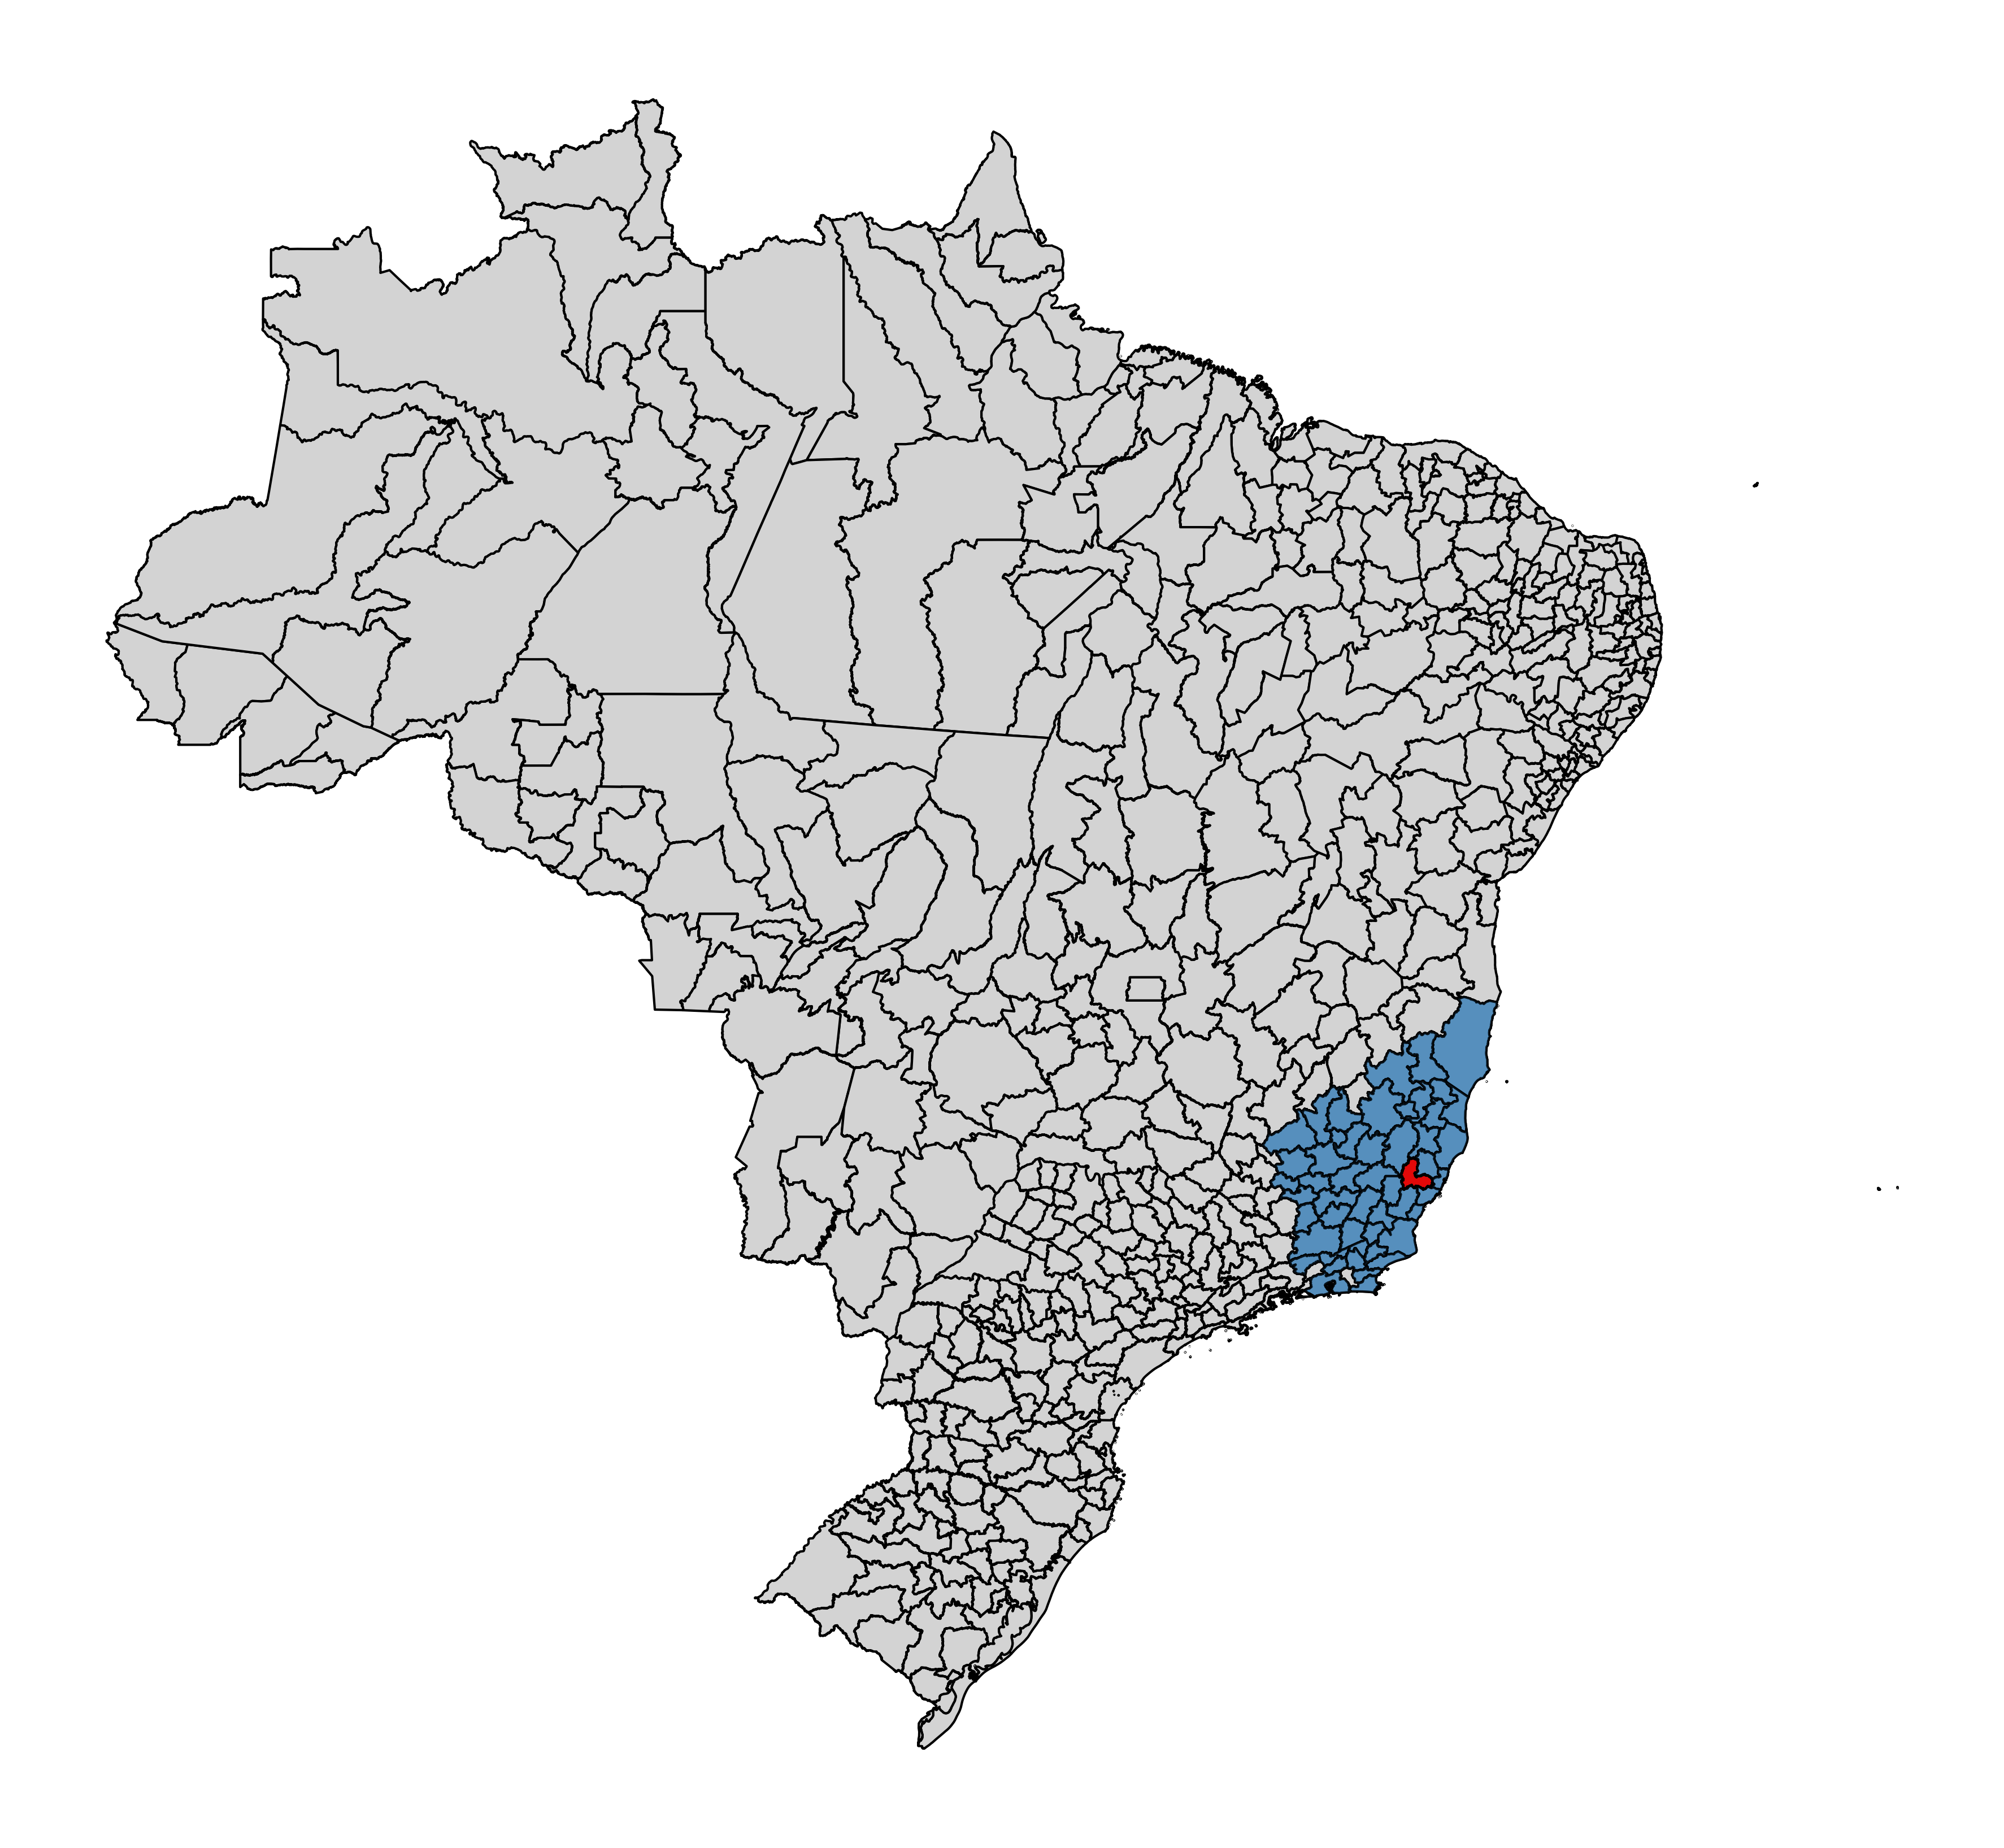

In [125]:
# plot full country and data
fig, ax = plt.subplots(figsize=(15, 15), dpi=300)
df.plot(facecolor="#D3D3D3FF", edgecolor="#000000", ax=ax)
data_urea.plot(facecolor="#377eb8", edgecolor="#000000", alpha=0.8, ax=ax)
plant_location.plot(facecolor="#E20909", edgecolor="#000000", ax=ax)
# ax.set_title("My cities", fontsize=20)
ax.axis("off")

(np.float64(-49.153881594199994),
 np.float64(-27.8808843938),
 np.float64(-24.91002143224999),
 np.float64(-12.174505402750007))

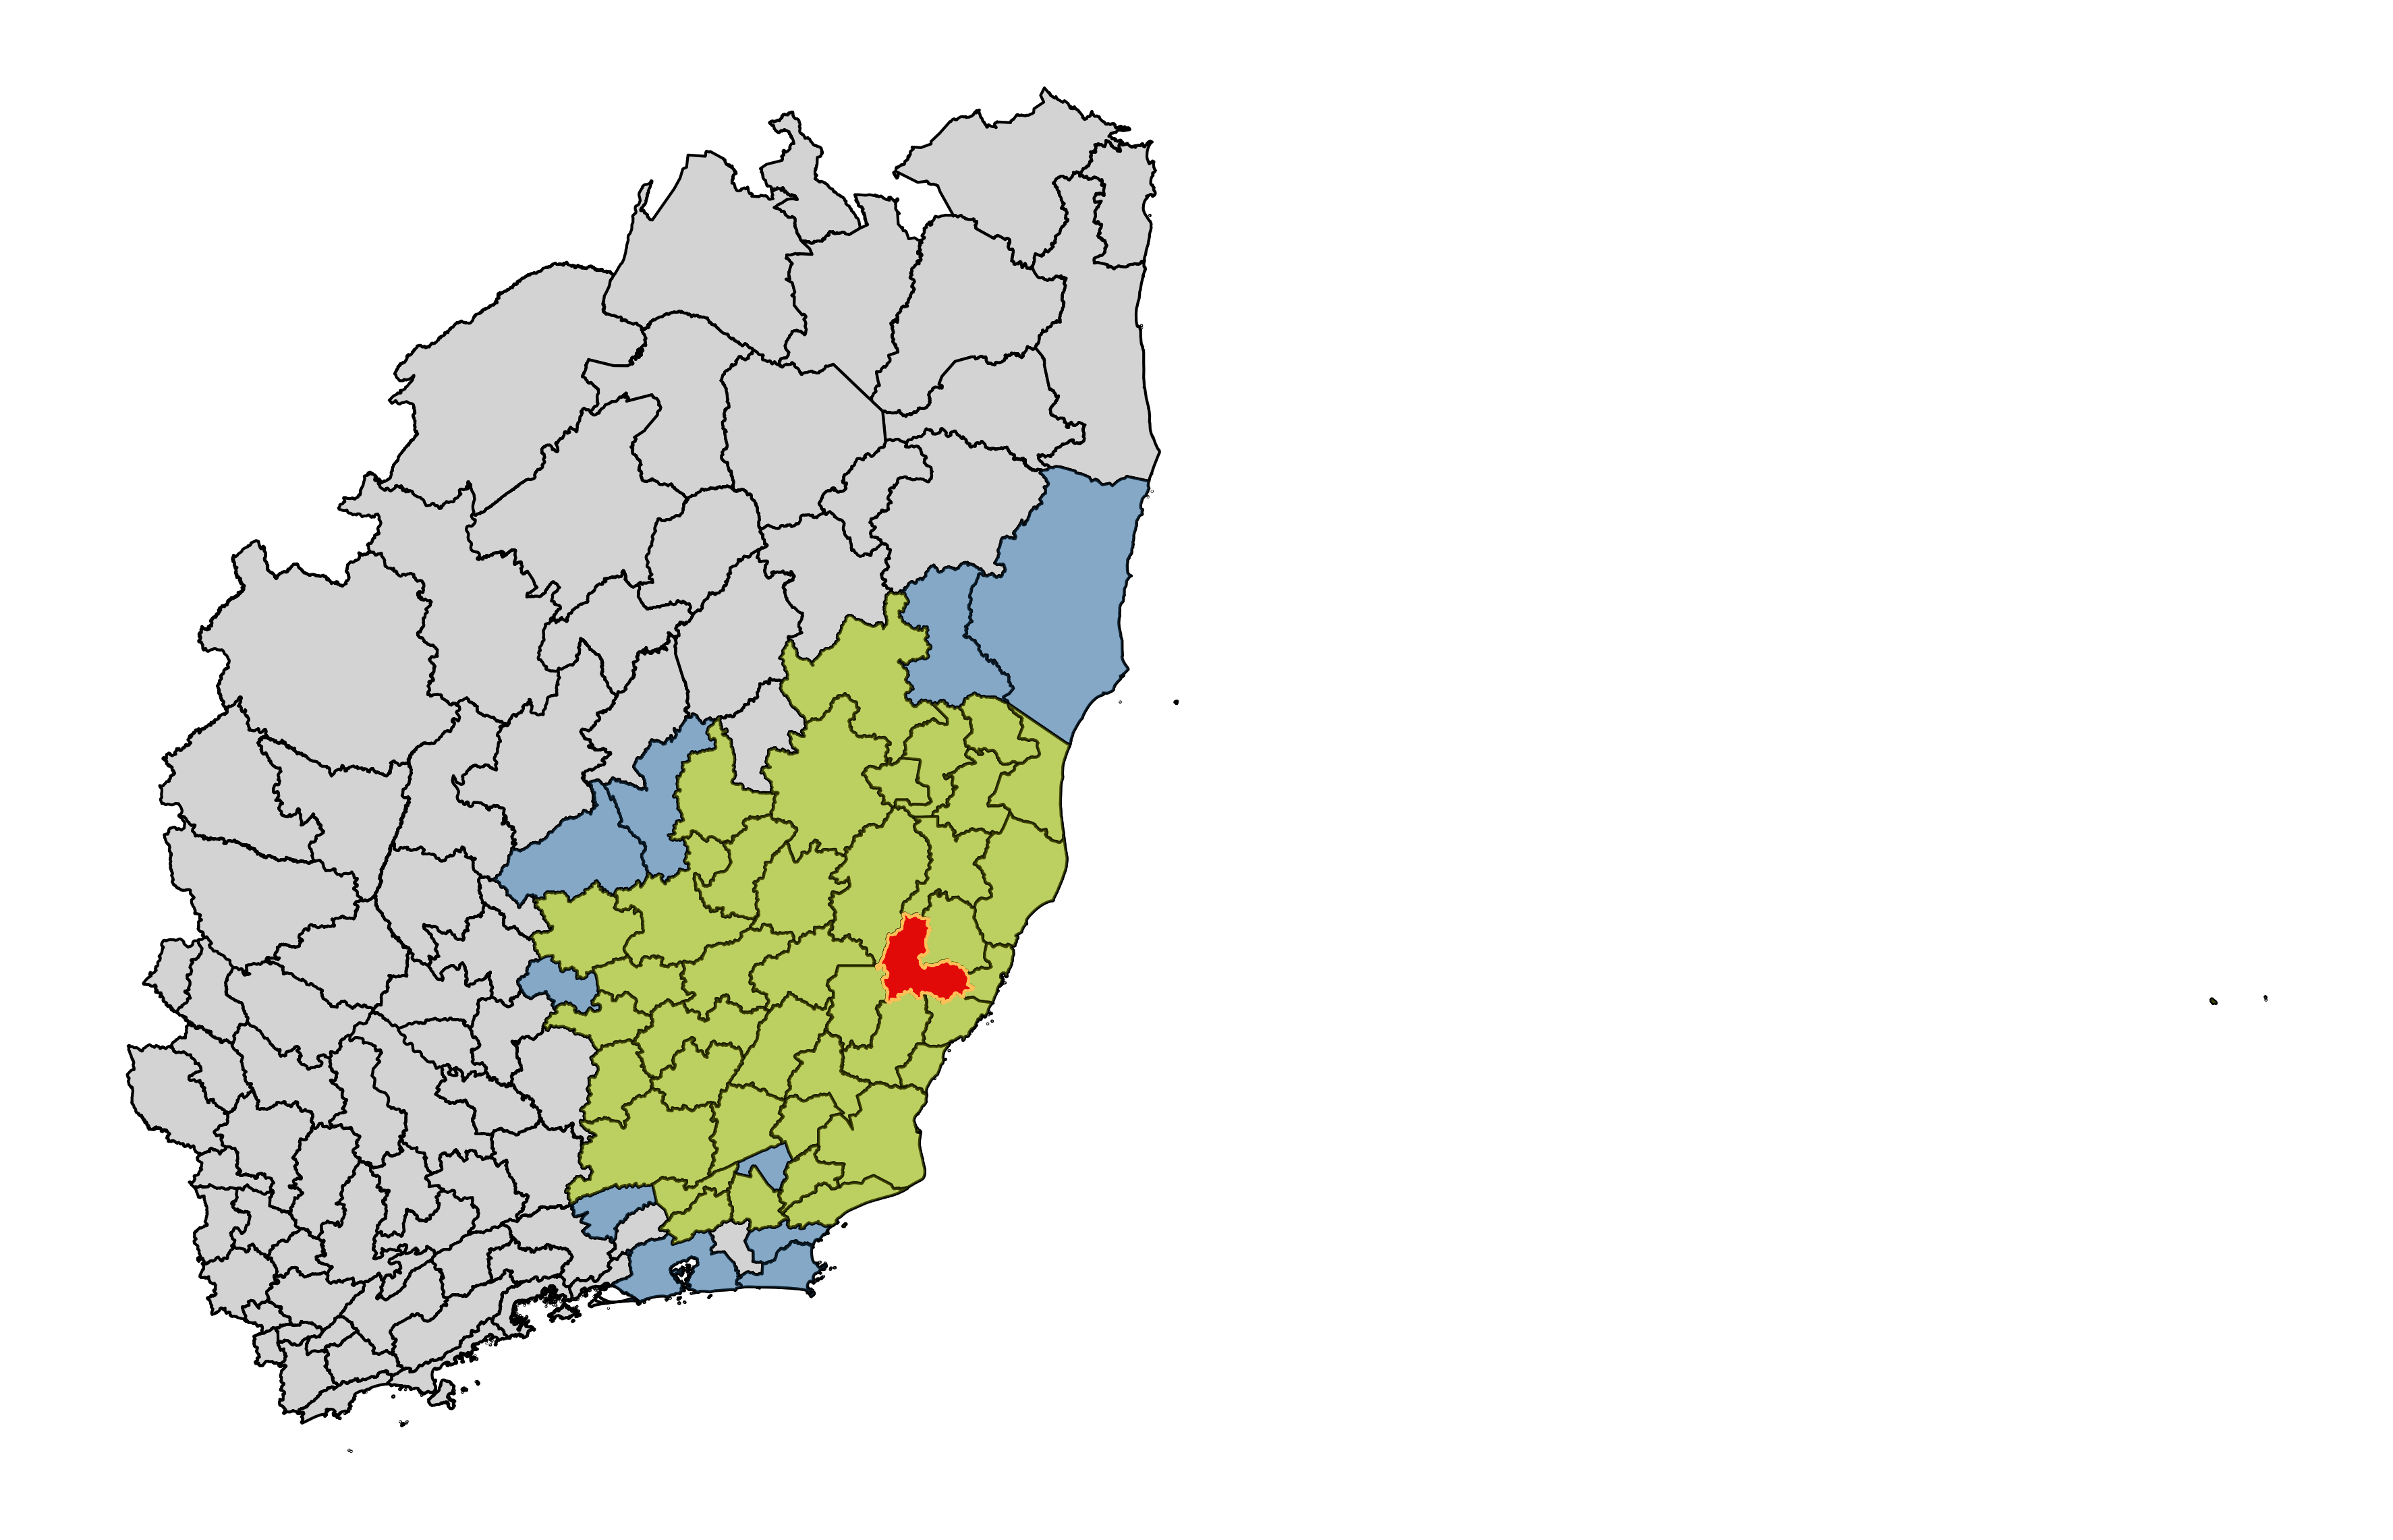

In [126]:
# plot zoom country and data
from shapely.geometry import Point, LineString
import geopandas as gpd

fig, ax = plt.subplots(figsize=(15, 15), dpi=300)
df_zoom.plot(facecolor="#D3D3D3FF", edgecolor="#000000", ax=ax)
data_urea.plot(facecolor="#377eb8", edgecolor="#000000", alpha=0.5, ax=ax)
data_biomass.plot(facecolor="#F4F800FF", alpha=0.5, edgecolor="#000000", ax=ax)

# for idx, row in data_urea.iterrows():
#     point1 = row['centroids']
#     point2 = plant_location.centroid.values[0]
#     line = LineString([point1, point2])
#     gdf_line = gpd.GeoDataFrame([{'geometry': line}])
#     gdf_line.plot(ax=ax, color='red',)
plant_location.plot(facecolor="#E20909", edgecolor="#FEBF57", ax=ax)
# ax.set_title("My cities", fontsize=20)
ax.axis("off")
